In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('spam.csv',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [6]:
#EDA
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)

In [8]:
data.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)
data.head()

,message_type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
encoder =LabelEncoder()
data['message_type']=encoder.fit_transform(data['message_type'])
data.head()

,message_type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#EDA
data.isnull().sum()

message_type    0
message         0
dtype: int64

In [11]:
data.duplicated().sum()

403

In [12]:
data= data.drop_duplicates()

In [13]:
data.duplicated().sum()

0

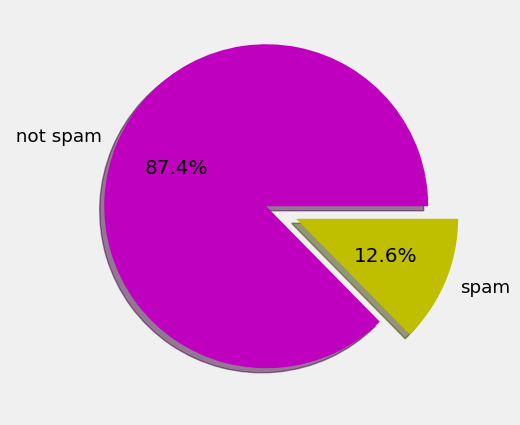

In [15]:
plt.style.use('fivethirtyeight')
colors = ['m','y']
explode = [0.1,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie(data['message_type'].value_counts(),labels=[' not spam','spam'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%')
plt.show()

In [16]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\MG
[nltk_data]     Magic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
data['num_characters']=data['message'].apply(len)
data.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
from nltk.tokenize import word_tokenize
data['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [20]:
data['num_words']=data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.sample(7)

,message_type,message,num_characters,num_words
2077,0,Hey hun-onbus goin 2 meet him. He wants 2go ou...,133,31
4531,0,Ok both our days. So what are you making for d...,73,18
3140,0,Customer place i will call you,30,6
2035,0,Simply sitting and watching match in office..,45,8
2969,0,U should make a fb list,23,6
3940,1,"Free Msg: get Gnarls Barkleys \Crazy\"" rington...",102,21
5014,0,I think the other two still need to get cash b...,73,18


In [21]:
data['num_sentences']=data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.sample(7)

,message_type,message,num_characters,num_words,num_sentences
4108,0,I want to lick your pussy now...,32,8,1
2277,0,Hello! How r u? Im bored. Inever thought id ge...,135,32,7
2561,0,And maybe some pressies,23,4,1
2650,0,Do you like shaking your booty on the dance fl...,50,11,1
990,0,26th OF JULY,12,3,1
4290,0,Call me when u're done...,25,7,1
3426,0,Haha okay... Today weekend leh...,34,7,1


In [22]:
data[data['message_type']==0][['num_characters','num_words','num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
num_words,4516.0,17.120903,13.493725,1.0,8.0,13.0,22.0,220.0
num_sentences,4516.0,1.799601,1.278465,1.0,1.0,1.0,2.0,28.0


In [23]:
data[data['message_type']==1][['num_characters','num_words','num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0
num_words,653.0,27.667688,7.008418,2.0,25.0,29.0,32.0,46.0
num_sentences,653.0,2.967841,1.483201,1.0,2.0,3.0,4.0,8.0


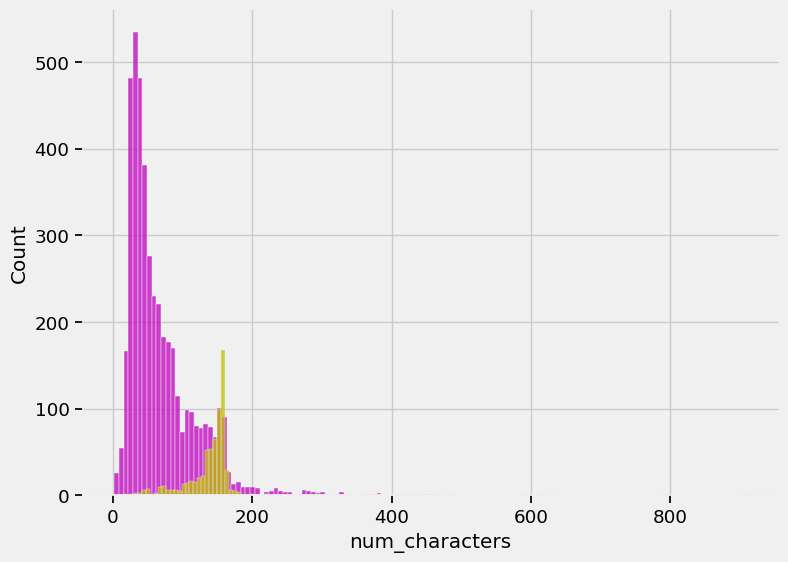

In [30]:
#for characters
plt.figure(figsize=(8,6))
sns.histplot(data[data['message_type']==0]['num_characters'],color='m')
sns.histplot(data[data['message_type']==1]['num_characters'],color = 'y')
plt.show()

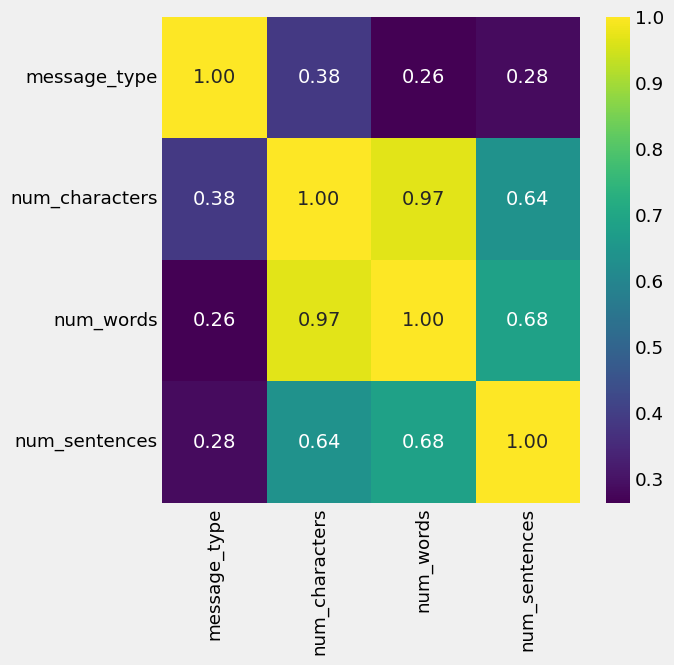

In [32]:
#Colerration check.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 6))
sns.heatmap(data.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

In [33]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)
    y=[] 
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    for i in message:
        y.append(ps.stem(i))
    
    #return y as list
    return " ".join(y)

In [34]:
# Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to C:\Users\MG
[nltk_data]     Magic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [35]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [37]:
data['transformed_msg']=data['message'].apply(text_transform)

In [38]:
data.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [40]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='yellow')

In [42]:
spam_wc=wc.generate(data[data['message_type']==1]['transformed_msg'].str.cat(sep=""))

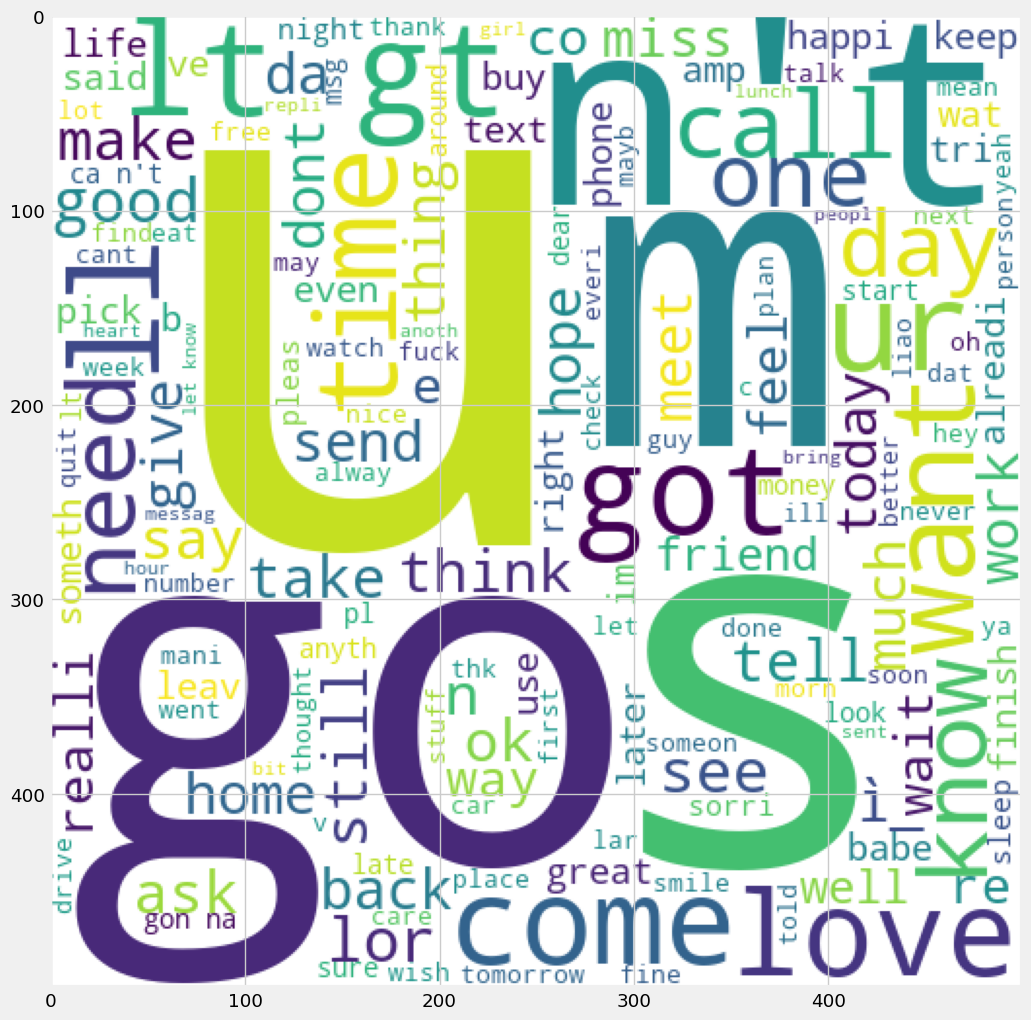

In [47]:
plt.figure(figsize=(14,12))
plt.imshow(spam_wc)
plt.show()

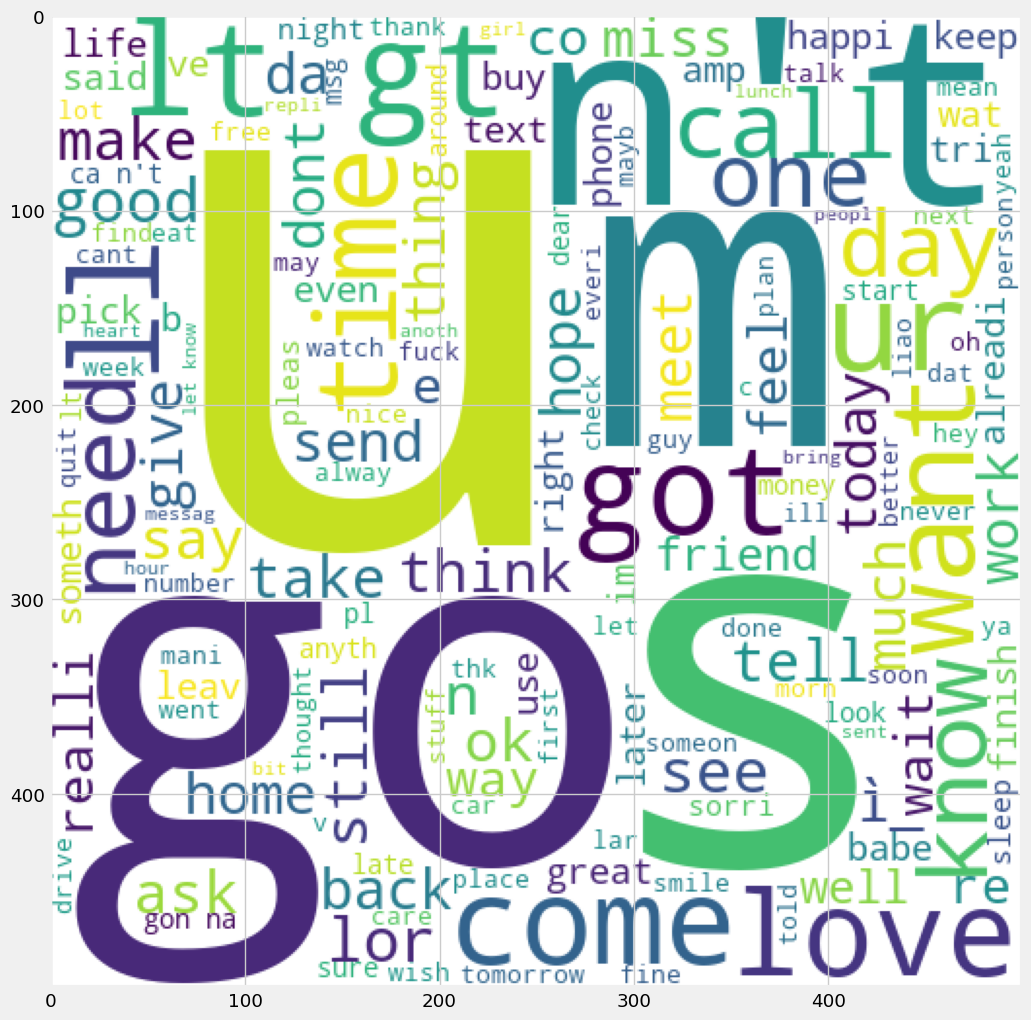

In [46]:
ham_wc=wc.generate(data[data['message_type']==0]['transformed_msg'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)
plt.show()

In [48]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000) 

In [50]:
X=tfidf.fit_transform(data['transformed_msg']).toarray()
y=data['message_type'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
#Training models.
models = [
           GaussianNB()
           ,BernoulliNB() 
           ,MultinomialNB()
         ]
for i in range(3):
    models[i].fit(X_train, y_train)


In [55]:
#Predict and show the Accuracy & Confutin matrix
for i in range (3):
    y_pred = models[i].predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confution matrix for model " f'{models[i]} : \n',cm)
    ac = accuracy_score(y_test, y_pred)
    print("Accuracy score for model " f'{models[i]} : ',ac)

Confution matrix for model GaussianNB() : 
 [[790 106]
 [ 19 119]]
Accuracy score for model GaussianNB() :  0.879110251450677
Confution matrix for model BernoulliNB() : 
 [[896   0]
 [ 14 124]]
Accuracy score for model BernoulliNB() :  0.9864603481624759
Confution matrix for model MultinomialNB() : 
 [[896   0]
 [ 26 112]]
Accuracy score for model MultinomialNB() :  0.9748549323017408


In [57]:
y_pred = models[1].predict(X_test)